# Predictive Analysis of Best Rated Seattle Airbnb    
Assuming that we are trying to help Airbnb make a prediction about the best rated airbnb in Seattle so that they can determine whether to recommend an airbnb to their users based on the prediction. In this project, we create a logistic regression model that will predict whether or not an airbnb can get a 4.5 or more score of rate. The whole process for this project is showed as below:       


1.   Import librabries
2.   Get the data
3.   Exploratory data analysis
    * data cleanup        
    * data visualization
4.   Predictive Analysis
    * converting categorical features
    * build the logistic regression model
    * training and predicting
    * evaluation
    * model optimization
    * model comparison
5.   Conclusion











# Import Libraries          

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV

# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

print("Packages loaded")

Packages loaded


#Get the Data     
Read the dataset into a pandas dataframe.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving seattle_01.csv to seattle_01.csv


In [0]:
df_airbnb = pd.read_csv("seattle_01.csv")
df_airbnb.head(1)

,Unnamed: 0,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
0,0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250,2018-12-20 03:46:14.698548,47.610819,-122.290816,0101000020E6100000D449B6BA9C925EC0416326512FCE...,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly


#Exploratory Data Analysis             

###Data Cleanup                             
Exclude irrelevant columns and null value.
*   Rate_type (100% nightly)
*   Currency (100% USD)
*   Last_modified (irrelevant information)

In [0]:
df_airbnb.drop(columns=['last_modified',
                        'location',
                        'Unnamed: 0',
                        'rate_type',
                        'currency'
                        ], axis=1,inplace=True )

In [0]:
df_airbnb.head()

,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,latitude,longitude,name
0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250,47.610819,-122.290816,"Casa Madrona - Urban Oasis, 1 block from the P..."
1,3335,4193,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,47.529846,-122.275840,Sweet Seattle Urban Homestead 2 Bdr
2,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,47.687801,-122.313427,Sunrise in Seattle Master Suite
3,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0.0,1.0,49,47.523980,-122.359891,"Cozy Studio, min. to downtown -WiFi"
4,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,47.654109,-122.337605,"Fab, private seattle urban cottage!"


In [0]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7576 entries, 0 to 7575
Data columns (total 13 columns):
room_id                 7576 non-null int64
host_id                 7576 non-null int64
room_type               7576 non-null object
address                 7576 non-null object
reviews                 7576 non-null int64
overall_satisfaction    6103 non-null float64
accommodates            7576 non-null int64
bedrooms                7576 non-null float64
bathrooms               7574 non-null float64
price                   7576 non-null int64
latitude                7576 non-null float64
longitude               7576 non-null float64
name                    7576 non-null object
dtypes: float64(5), int64(5), object(3)
memory usage: 769.6+ KB


In [0]:
df_airbnb.describe()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,latitude,longitude
count,7.576000e+03,7.576000e+03,7576.000000,6103.000000,7576.000000,7576.000000,7574.000000,7576.000000,7576.000000,7576.000000
mean,1.778928e+07,5.245040e+07,47.657999,4.841226,3.682946,1.385428,1.307367,113.024419,47.624349,-122.318351
std,8.739765e+06,5.955274e+07,65.889329,0.281678,2.332280,1.009823,0.641036,122.481780,0.046270,0.057974
min,2.318000e+03,2.536000e+03,0.000000,2.500000,1.000000,0.000000,0.000000,15.000000,47.508078,-122.420918
25%,1.121214e+07,8.315334e+06,4.000000,4.500000,2.000000,1.000000,1.000000,65.000000,47.604229,-122.350809
50%,1.960824e+07,2.696758e+07,21.000000,5.000000,3.000000,1.000000,1.000000,88.000000,47.620036,-122.328914
75%,2.484480e+07,8.073960e+07,64.000000,5.000000,4.000000,2.000000,1.500000,125.000000,47.659751,-122.303758
max,3.099842e+07,2.314354e+08,687.000000,5.000000,28.000000,8.000000,8.000000,5900.000000,47.723050,-122.114887


In [0]:
print(df_airbnb['overall_satisfaction'].value_counts(dropna=False))

5.0    4410
4.5    1503
NaN    1473
4.0     141
3.5      44
3.0       4
2.5       1
Name: overall_satisfaction, dtype: int64


In [0]:
print(df_airbnb['bathrooms'].value_counts(dropna=False))

1.0    5630
2.0     867
1.5     397
2.5     289
3.0     154
3.5     150
4.0      34
0.5      28
0.0      10
4.5       6
5.0       4
8.0       3
6.0       2
NaN       2
Name: bathrooms, dtype: int64


In [0]:
airbnb_dropped = df_airbnb.dropna()
airbnb_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6101 entries, 0 to 7425
Data columns (total 13 columns):
room_id                 6101 non-null int64
host_id                 6101 non-null int64
room_type               6101 non-null object
address                 6101 non-null object
reviews                 6101 non-null int64
overall_satisfaction    6101 non-null float64
accommodates            6101 non-null int64
bedrooms                6101 non-null float64
bathrooms               6101 non-null float64
price                   6101 non-null int64
latitude                6101 non-null float64
longitude               6101 non-null float64
name                    6101 non-null object
dtypes: float64(5), int64(5), object(3)
memory usage: 667.3+ KB


In [0]:
airbnb_dropped.rename(columns = {'reviews' :'Total Reviews',
                                 'overall_satisfaction':'Customer Rating',
                                 'room_id':'Room ID',
                                 'host_id':'Host ID',
                                 'room_type': 'Room Type',           
                                 'address' : 'Address',                
                                 'accommodates' : 'Accommodates' ,        
                                 'bedrooms' : 'Bedrooms' ,            
                                 'bathrooms' : 'Bathrooms' ,           
                                 'price':'Cost' ,               
                                 'name':'Name',
                                 'latitude':'Latitude',
                                 'longitude':'Longitude'
                                  }, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [0]:
airbnb = pd.DataFrame(airbnb_dropped)
airbnb.head()

,Room ID,Host ID,Room Type,Address,Total Reviews,Customer Rating,Accommodates,Bedrooms,Bathrooms,Cost,Latitude,Longitude,Name
0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250,47.610819,-122.290816,"Casa Madrona - Urban Oasis, 1 block from the P..."
2,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,47.687801,-122.313427,Sunrise in Seattle Master Suite
3,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0.0,1.0,49,47.523980,-122.359891,"Cozy Studio, min. to downtown -WiFi"
4,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,47.654109,-122.337605,"Fab, private seattle urban cottage!"
5,9419,30559,Private room,"Seattle, WA, United States",130,4.5,2,1.0,3.0,65,47.550167,-122.319366,Glorious sun room w/ memory foambed


###Data Visualization

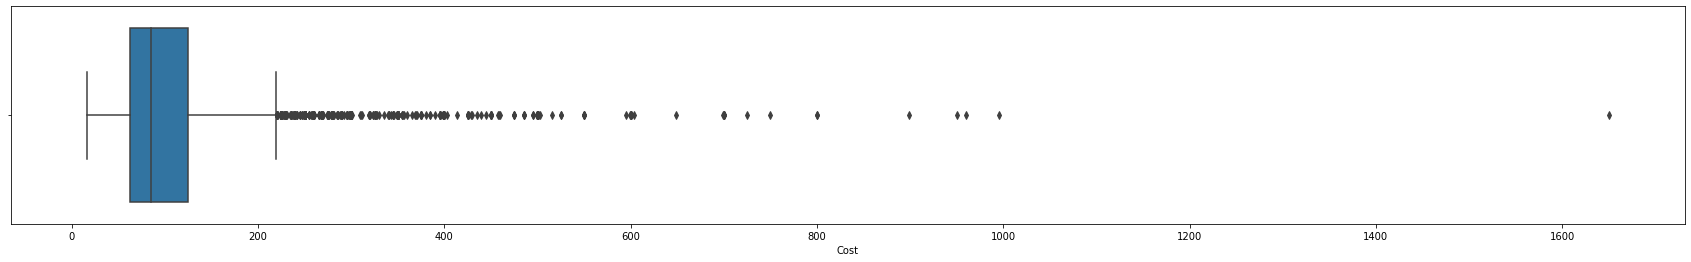

In [0]:
plt.figure(figsize=(30, 4))
sns.boxplot(x=airbnb['Cost'])

In [0]:
airbnb['Cost'].describe()

count    6101.000000
mean      107.335027
std        82.896536
min        16.000000
25%        62.000000
50%        85.000000
75%       125.000000
max      1650.000000
Name: Cost, dtype: float64

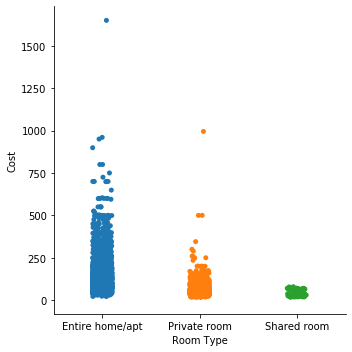

In [0]:
sns.catplot(x="Room Type", y="Cost", data=airbnb);

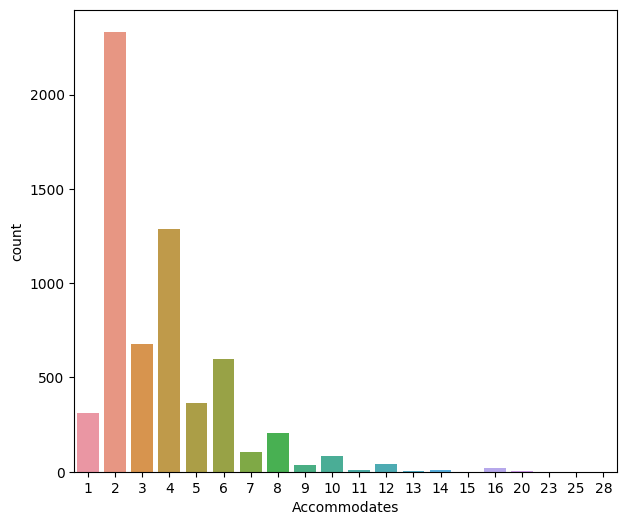

In [0]:
plt.figure(figsize=(7, 6))
sns.countplot(data=airbnb,x="Accommodates")

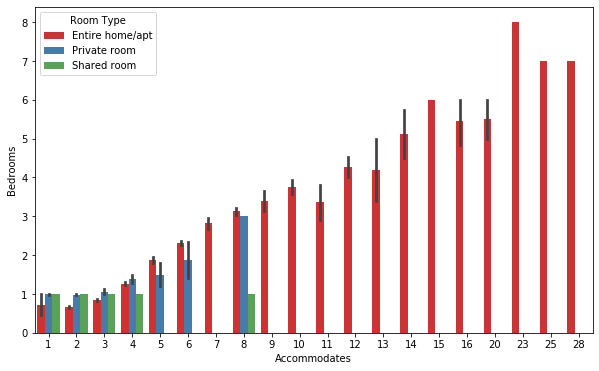

In [0]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Accommodates",y="Bedrooms",hue="Room Type",data=airbnb,palette="Set1")

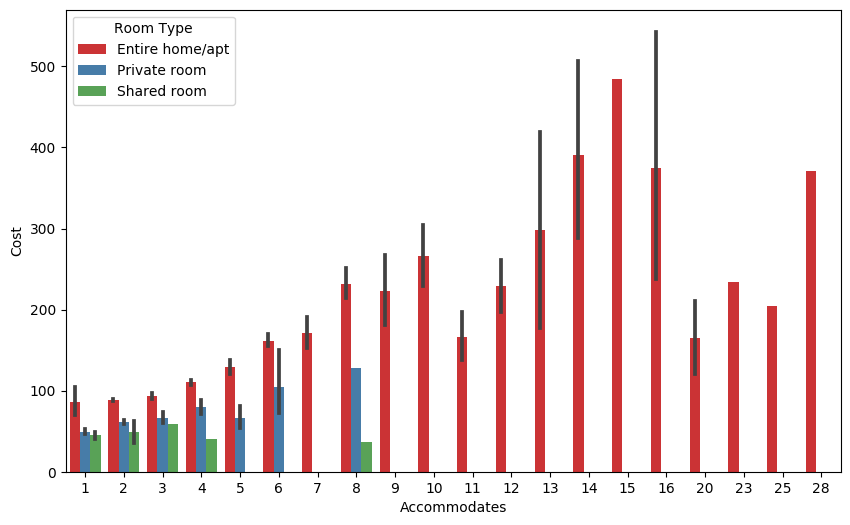

In [0]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Accommodates",y="Cost",hue="Room Type",data=airbnb,palette="Set1")

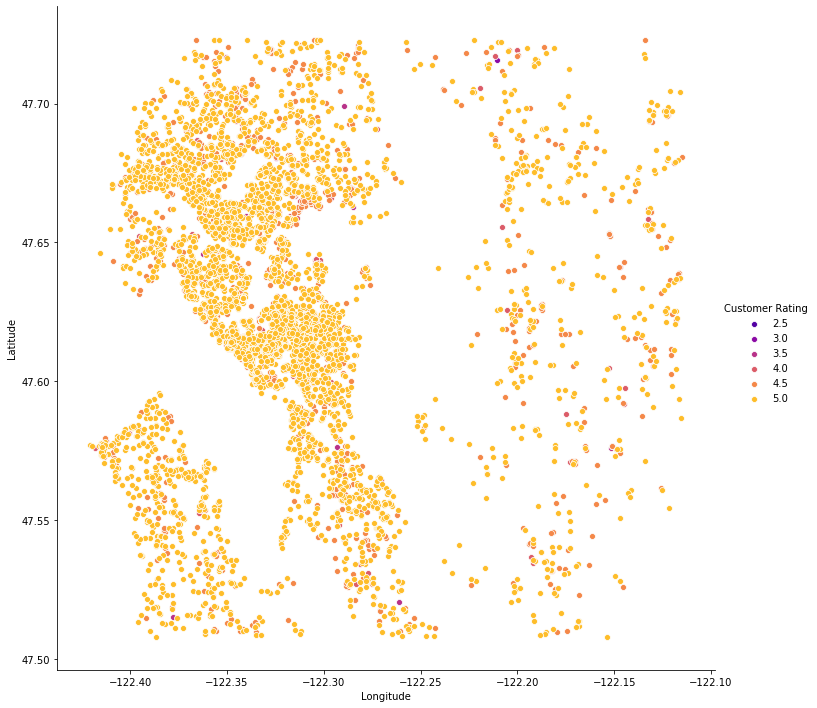

In [0]:
sns.pairplot(x_vars=['Longitude'],y_vars=['Latitude'], data=airbnb, hue="Customer Rating", height=10,palette="plasma")


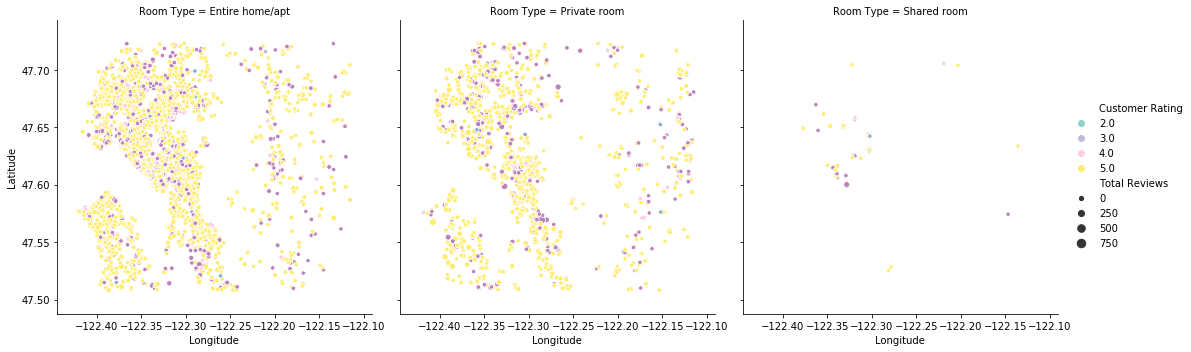

In [0]:
sns.relplot(x='Longitude',y='Latitude',hue="Customer Rating",size='Total Reviews',col='Room Type',data=airbnb,palette="Set3")

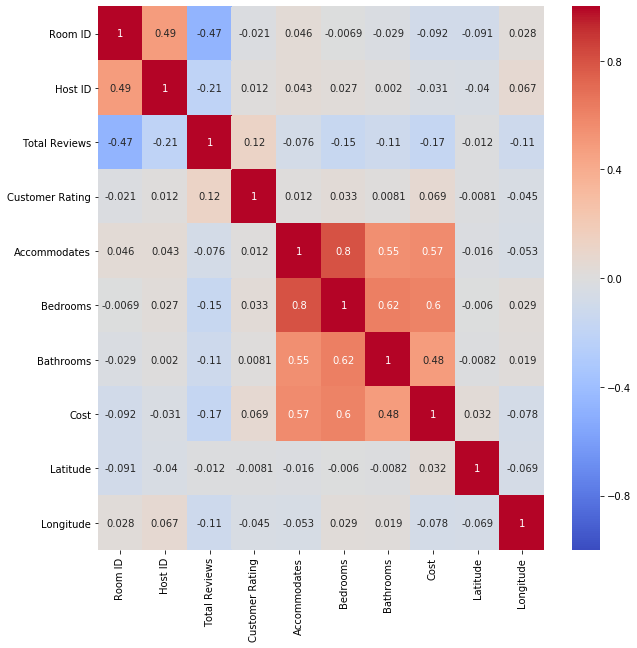

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(airbnb.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True
            );

In [0]:
df_count =airbnb.groupby(by=['Room Type'])['Cost','Total Reviews'].count()
df_count

,Cost,Total Reviews
Room Type,,
Entire home/apt,4482,4482
Private room,1529,1529
Shared room,90,90


In [0]:
df= airbnb.groupby(by=['Room Type'])['Cost','Total Reviews',].mean()
df['Count'] =[4482,1529,90]
data = df.reset_index()
data

,Room Type,Cost,Total Reviews,Count
0,Entire home/apt,124.142347,58.653057,4482
1,Private room,61.728581,61.819490,1529
2,Shared room,45.133333,25.088889,90


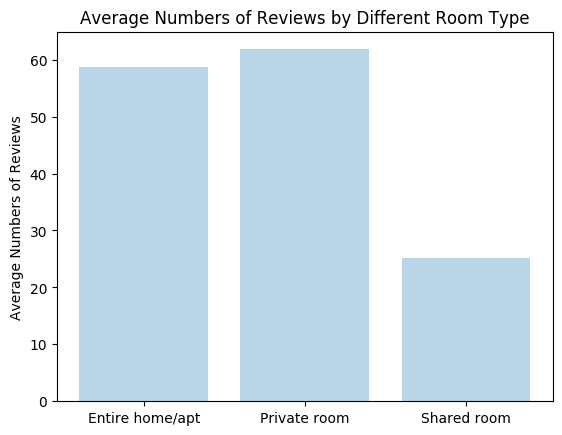

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()

x_axis = data['Room Type']
y_pos = np.arange(len(x_axis))
performance = data['Total Reviews']

plt.bar(y_pos, performance, align='center', alpha=0.3)
plt.xticks(y_pos, x_axis)
plt.ylabel('Average Numbers of Reviews')
plt.title('Average Numbers of Reviews by Different Room Type')

plt.show()

#Predictive Analytics            
Use logistic regression model to predict whether an airbnb can get a 4.5 or more score of rating.

###Converting Categorical Features         
Convert categorical features to dummy variables by using pandas. Otherwise our model won't be able to directly take in those features as inputs.

In [0]:
airbnb.columns

Index(['Room ID', 'Host ID', 'Room Type', 'Address', 'Total Reviews',
       'Customer Rating', 'Accommodates', 'Bedrooms', 'Bathrooms', 'Cost',
       'Latitude', 'Longitude', 'Name'],
      dtype='object')

In [0]:
df_airbnb=airbnb[['Room ID', 'Host ID', 'Room Type', 'Address', 'Total Reviews', 'Customer Rating', 'Accommodates', 'Bedrooms', 'Bathrooms', 'Cost']]
df_airbnb.columns

Index(['Room ID', 'Host ID', 'Room Type', 'Address', 'Total Reviews',
       'Customer Rating', 'Accommodates', 'Bedrooms', 'Bathrooms', 'Cost'],
      dtype='object')

In [0]:
df_airbnb.reset_index(inplace=True)
df_airbnb.drop('index',axis=1,inplace=True)
#df_airbnb.drop('level_0',axis=1,inplace=True)
df_airbnb.head(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Room ID,Host ID,Room Type,Address,Total Reviews,Customer Rating,Accommodates,Bedrooms,Bathrooms,Cost
0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250
1,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82
2,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0.0,1.0,49
3,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90
4,9419,30559,Private room,"Seattle, WA, United States",130,4.5,2,1.0,3.0,65
5,9460,30832,Private room,"Seattle, WA, United States",401,5.0,2,1.0,1.0,78
6,9531,31481,Entire home/apt,"Seattle, WA, United States",35,5.0,4,2.0,1.0,165
7,9534,31481,Entire home/apt,"Seattle, WA, United States",36,5.0,3,2.0,1.0,95
8,9596,14942,Entire home/apt,"Seattle, WA, United States",76,4.5,4,1.0,1.0,115
9,9909,33360,Entire home/apt,"Seattle, WA, United States",57,5.0,4,2.0,1.0,135


In [0]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6101 entries, 0 to 6100
Data columns (total 10 columns):
Room ID            6101 non-null int64
Host ID            6101 non-null int64
Room Type          6101 non-null object
Address            6101 non-null object
Total Reviews      6101 non-null int64
Customer Rating    6101 non-null float64
Accommodates       6101 non-null int64
Bedrooms           6101 non-null float64
Bathrooms          6101 non-null float64
Cost               6101 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 476.8+ KB


In [0]:
df_airbnb['Room Type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [0]:
df_airbnb['Customer Rating'].nunique()

6

In [0]:
df_airbnb['Accommodates'].nunique()

20

In [0]:
df_airbnb['Bedrooms'].nunique()

9

In [0]:
df_airbnb['Bathrooms'].nunique()

13

In [0]:
df_airbnb['Address'].unique()

array(['Seattle, WA, United States', 'Kirkland, WA, United States',
       'Bellevue, WA, United States', 'Redmond, WA, United States',
       'Seattle, WA', 'Mercer Island, WA, United States',
       'Renton, WA, United States', 'Ballard, Seattle, WA, United States',
       'West Seattle, WA, United States', 'Medina, WA, United States',
       '西雅图, WA, United States', 'Newcastle, WA, United States',
       'Seattle , WA, United States',
       'Ballard Seattle, WA, United States',
       'Yarrow Point, WA, United States', 'Clyde Hill, WA, United States',
       'Tukwila, WA, United States',
       'Seattle, Washington, US, WA, United States',
       'Capitol Hill, Seattle, WA, United States',
       'Kirkland , Wa, United States', 'Hunts Point, WA, United States',
       'Seattle, DC, United States', 'Seattle, United States'],
      dtype=object)

In [0]:
dummy_roomtype = pd.get_dummies(df_airbnb['Room Type'], prefix = 'room_type')
dummy_address = pd.get_dummies(df_airbnb['Address'], prefix = 'address')
dummy_roomtype.head(10)

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
5,0,1,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [0]:
def mydummy(arr,s,colname):
  lst=[]
  for a in arr:
    if a>=s:
      lst.append(1)
    else:
      lst.append(0)
  lst=pd.DataFrame({colname:lst})
  return lst
 
dummy_ratings=mydummy(df_airbnb['Customer Rating'],4.5,'Customer Rating')

In [0]:
activity_data=dummy_ratings.join(df_airbnb['Cost'])
activity_data=activity_data.join(df_airbnb['Accommodates'])
activity_data=activity_data.join(df_airbnb['Bedrooms'])
activity_data=activity_data.join(df_airbnb['Bathrooms'])
activity_data=activity_data.join(dummy_roomtype)
activity_data=activity_data.join(dummy_address)
activity_data=sm.add_constant(activity_data, prepend=False)

activity_data.head(10)

,Customer Rating,Cost,Accommodates,Bedrooms,Bathrooms,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,"address_Ballard Seattle, WA, United States","address_Ballard, Seattle, WA, United States","address_Bellevue, WA, United States","address_Capitol Hill, Seattle, WA, United States","address_Clyde Hill, WA, United States","address_Hunts Point, WA, United States","address_Kirkland , Wa, United States","address_Kirkland, WA, United States","address_Medina, WA, United States","address_Mercer Island, WA, United States","address_Newcastle, WA, United States","address_Redmond, WA, United States","address_Renton, WA, United States","address_Seattle , WA, United States","address_Seattle, DC, United States","address_Seattle, United States","address_Seattle, WA","address_Seattle, WA, United States","address_Seattle, Washington, US, WA, United States","address_Tukwila, WA, United States","address_West Seattle, WA, United States","address_Yarrow Point, WA, United States","address_西雅图, WA, United States",const
0,1,250,8,4.0,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
1,1,82,2,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
2,1,49,2,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
3,1,90,2,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
4,1,65,2,1.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
5,1,78,2,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
6,1,165,4,2.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
7,1,95,3,2.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
8,1,115,4,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
9,1,135,4,2.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0


###Build the Logistic Regression Model         
Split the data into a training set and test set.

In [0]:
explanatory_cols=activity_data.columns[1:]
train_data, test_data = train_test_split(activity_data, test_size=0.25)

###Training and Predicting     

In [0]:
logistic=linear_model.LogisticRegression()

X=train_data[explanatory_cols]
y=train_data['Customer Rating']
log_model = log.fit(X,y)

###Evaluation            
Check the accuracy and precision using confusion matrix.

In [0]:
def predict(y,X):
    prediction=[0 if i<0.5 else 1 for i in result.predict(X).tolist()]
    
    print(metrics.confusion_matrix(y,prediction))
    holder = metrics.confusion_matrix(y,prediction)
    TN = holder[0][0]
    TP = holder[1][1]
    FN = holder[1][0]
    FP = holder[0][1]
    
    print("Accuracy:", (TP + TN) / (TP + TN + FN + FP))
    print("Precision:", (TP) / (TP + FP))


predict(test_data['Customer Rating'], test_data[explanatory_cols])

[[   5   38]
 [  16 1467]]
Accuracy: 0.9646133682830931
Precision: 0.9747508305647841


###Model Optimization
Use GridSearchCV to optimize the model.

In [0]:
grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]}
clf = GridSearchCV(logistic, grid, cv=5)

X=train_data[explanatory_cols]
y=train_data['Customer Rating']
best_model = clf.fit(X,y)

###Model Comparison 
Compare Accuracy scores from Unoptimized and Optimized models.


*   Unoptimized Model




In [0]:
X=train_data[explanatory_cols]
y=train_data['Customer Rating']

print("train_accuracy :",log_model.score(X,y))
print("test_accuracy :",log_model.score(test_data[explanatory_cols],test_data['Customer Rating']))

train_accuracy : 0.9678688524590164
test_accuracy : 0.971821756225426



*   Optimized Model



In [0]:
print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)
print("best_train_accuracy :",best_model.best_score_)
print("best_test_accuracy :",best_model.score(test_data[explanatory_cols],test_data['Customer Rating']))

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l1'}
best_train_accuracy : 0.9678688524590164
best_test_accuracy : 0.971821756225426


#Conclusion       
The bulk of this project is on performing some exploratory data analysis to help understand the dataset, and developing a classification model to correctly rate 4.5 or more score Airbnb listings.                      
When building and training our model, we considered many factors such as Room Type, Address, Customer Rating, Accommodates, Bedrooms, Bathrooms, Cost. Although some factors have less relationship with ratings, we still include them to build and train our model. That's because we think that the data comes from the real-world, and including all the factors can make our result be more realistic and representative.                                           
We achieved an accuracy with 97% for our logistic regression model. It seems that our model performs very well. Here we also used an optimized model to see if the model can be better optimized. Since we have already got a 97% accuracy which is a very high score for our original model, we got the same accuracy for our optimized model. So the conclusion for our model is that our original ligistic model performs very well.                      